# Continual Anomaly Detection Experiments

---

### Datasets

We have 2 datasets, MVTec-AD for benchmarking the traditional continual learning methods under the usual framework, where each category/object is its own task, and MTD, which contains one object type, Magnetic Tile Defects.

The magnetic tiles have 5 different kinds of defects, and we will use this dataset to test out how benchmark methods perform in a continous data drift scenario. We will run several experiments on the MTD dataset, where each experiment will have _T_ tasks. The tasks will be progressive disruptions to the image at increasing intensity levels. 

For example, let's say we have an experiment where we see how increasing color jittering (adjusting brightness, saturationm and contrast) over time can be detected accurately, and color jitter can be on an intensity scale of [0, 1]. For task 1, we might jitter the color of images only at intensities within the windowed interval [0, 0.1]. For task 2, we might increase this window to [0, 0.2], and so on. We will be experimenting with different window sizes and whether they overlap or not, and we will save the dataset from our final reported results.

### Experiments

Under a general Continual Learning framework, we assume that a model will experience a series of tasks, where tasks are learned/adapted to one at a time and then tested after learning each task on all previous tasks. 

We will run an experiment to benchmark methods under the current general framework, which uses MVTec-AD and assumes that each category/object is its own task. This is the simplest experiment and is generally used in current literature, in some form or another. This task should be the simplest, because each category has a completely different pixel distribution space. 

For the different disruption types on MTD, we are running an experiment for each type of image distortion:
- __Color Jitter__, which simulates lighting/color changes
- __Blur__, which applies Gaussian Blur and simulates sensor wear or sensor out of focus
- __Geometric__, which applies a mixture of rotation, translation, and shear to simulate product movement or deformation

Again, the idea for these next experiments is that each task will have a similar or overlapping image pixel space, and we can test how well each method learns tasks in a continuous drift manner.   

Showing Normal images and masks compared with Color, Blur, and Geometric transformations


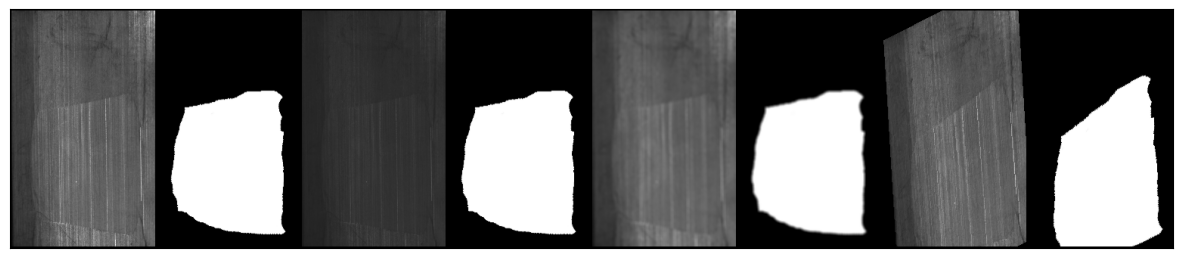

In [1]:
import datasets

# Let's showcase how the different MTD data augmentations look like
print('Showing Normal images and masks compared with Color, Blur, and Geometric transformations')
imgs = []
for params in [(None, None), 
               ('color', [0, 0.75]), 
               ('blur', [5, 2]),
               ('geometric', [60, 20, 0.1, 30])]:
    new_mtd = datasets.mtd(train=True, unsupervised=False, transform=None, 
                           data_aug=params[0], data_aug_params=params[1])
    imgs.append(new_mtd[2]['image'])
    imgs.append(new_mtd[2]['ground_truth_mask'])
datasets.show(imgs)
